In [1]:
%matplotlib inline
import os
from glob import glob
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
from tensorflow.keras.models import Model, model_from_json
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D, Flatten, Dense, concatenate

from tensorflow.keras.layers import Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers
from sklearn.metrics import confusion_matrix
from plot_confusion_matrix import plot_confusion_matrix

import cv2
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
def read_data(directory):
# =============================================================================
#  This function gets a directory name and returns all images in it concatenated 
#  to each other
# =============================================================================    
    data_list = glob(os.path.join(directory ,r'*.png'))
    #print(os.path.join(directory,'*.png'))
    data = np.asarray([cv2.imread(img,0) for img in data_list])
    return data


In [4]:
# initialize COCO api for instance annotations
# coco=COCO(annFile)

In [5]:
# display COCO categories and supercategories
# cats = coco.loadCats(coco.getCatIds())
# nms=[cat['name'] for cat in cats]
# print('COCO categories: \n{}\n'.format(' '.join(nms)))

# nms = set([cat['supercategory'] for cat in cats])
# print('COCO supercategories: \n{}'.format(' '.join(nms)))

In [6]:
# get all images containing given categories, select one at random
#catIds = coco.getCatIds(catNms=['person','sports ball']);
#imgIds = coco.getImgIds(catIds=catIds );
#imgIds = coco.getImgIds(imgIds = imgIds[2])
#img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

In [7]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
#I = io.imread(img['coco_url'])
#plt.axis('off')
#plt.imshow(I)
#plt.show()

In [8]:
# load and display instance annotations
#plt.imshow(I); plt.axis('off')
#annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
#anns = coco.loadAnns(annIds)
#coco.showAnns(anns)

In [9]:
# initialize COCO api for person keypoints annotations
#annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
#coco_kps=COCO(annFile)

In [10]:
# load and display keypoints annotations
#plt.imshow(I); plt.axis('off')
#ax = plt.gca()
#annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
#anns = coco_kps.loadAnns(annIds)
#coco_kps.showAnns(anns)

In [11]:
# initialize COCO api for caption annotations
#annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
#coco_caps=COCO(annFile)

In [12]:
# load and display caption annotations
#annIds = coco_caps.getAnnIds(imgIds=img['id']);
#anns = coco_caps.loadAnns(annIds)
#coco_caps.showAnns(anns)
#plt.imshow(I); plt.axis('off'); plt.show()

loading annotations into memory...
Done (t=15.77s)
creating index...
index created!


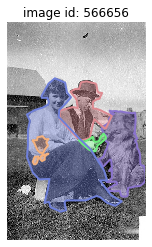

In [105]:
# the index of the image from the set just to visualize 
img_idx = 0

dataDir = "E:\Documents\Study\Deep Learning\Project\DATA"
data_name = "train2017"
annFile='{}/annotations/instances_{}.json'.format(dataDir,data_name)

# load captions
#coco_caps= COCO(os.path.join(dataDir,r"annotations\captions_" + data_name + ".json"))
# Load insatnces -> here we take the masks
coco_instances = COCO(os.path.join(dataDir,r"annotations\instances_" + data_name + ".json"))
# Load key points
#coco_key_p = COCO(os.path.join(dataDir,r"annotations\person_keypoints_" + data_name + ".json")) 

# in the .getCatIds(catNms=[list of all ids we want to filter from the data]);
categories_names = ['person','dog','cat']

#we resize the images because of memory limitations on my 32GB memory PC 64X64 is the maximum
img_width = 64
img_height = 64

# get the id for each category specified
catIds = coco_instances.getCatIds(catNms=categories_names);

#get all image id in the directory
all_imgIds = coco_instances.getImgIds()

# get all the image id for all images based on the filter
imgIds = coco_instances.getImgIds(catIds=catIds);

# get the data for each image id with specified annotations
img_data = coco_instances.loadImgs(imgIds)

# Visualize the img_idx specified up here
I = io.imread(os.path.join(dataDir, data_name +r"//" +str(imgIds[img_idx]).zfill(12) + ".jpg"))
plt.imshow(I); 
plt.axis('off')
plt.title("image id: " + str(imgIds[img_idx]))

# and show the mask on top of the image
annIds = coco_instances.getAnnIds(imgIds=imgIds[img_idx], catIds=catIds, iscrowd=None)
anns = coco_instances.loadAnns(annIds)
coco_instances.showAnns(anns)

#plot key points
#annIds_keys = coco_key_p.getAnnIds(imgIds=imgIds[idx], catIds=catIds, iscrowd=None)
#anns_keys = coco_key_p.loadAnns(annIds_keys)
#coco_key_p.showAnns(anns_keys)

#print the caption
#annIds = coco_caps.getAnnIds(imgIds=imgIds[idx]);
#anns = coco_caps.loadAnns(annIds)
#coco_caps.showAnns(anns)

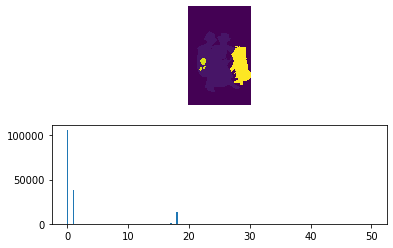

In [108]:
#visualize the mask of the annotaion
# every annotation has a id (number) for every pixel on the mask we multiply by id
# pixel = id = we have annotation in the pixel
# pixel = 0 we dont have annotation in that spot
anns_img = np.zeros((img_data[img_idx]['height'],img_data[img_idx]['width']))
for ann in anns:
    #mask += coco_instances.annToMask(anns[i])*anns[i]['category_id'] 
    anns_img = np.maximum(anns_img, coco_instances.annToMask(ann)*ann['category_id'])
    
plt.subplot(2,1,1)    
plt.imshow(anns_img)
plt.axis('off')
plt.subplot(2,1,2)
# Visuaslize the histogram of the mask
plt.hist(anns_img.ravel(),256, [0,50]);

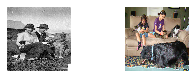

In [95]:
# #visualize 
# number_of_images = 2
# for idx in range(number_of_images):
#     plt.subplot(3,3,idx+1)
#     I = io.imread(os.path.join(dataDir, data_name +r"//" +str(imgIds[idx]).zfill(12) + ".jpg"))
#     I = cv2.resize(I, dsize=(img_width, img_height), interpolation=cv2.INTER_CUBIC)
#     plt.imshow(I)
#     plt.axis('off')


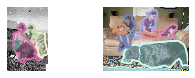

In [96]:

# for idx in range(number_of_images):
#     plt.subplot(3,3,idx+1)
#     I = io.imread(os.path.join(dataDir, data_name +r"//" +str(imgIds[idx]).zfill(12) + ".jpg"))
#     plt.imshow(I)
#     annIds = coco_instances.getAnnIds(imgIds=imgIds[idx], catIds=catIds, iscrowd=None)
#     anns = coco_instances.loadAnns(annIds)
#     coco_instances.showAnns(anns)
#     plt.axis('off')



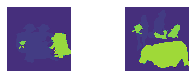

In [97]:

# for idx in range(number_of_images):
#     plt.subplot(3,3,idx+1)
#     annIds = coco_instances.getAnnIds(imgIds=imgIds[idx], catIds=catIds, iscrowd=None)
#     anns = coco_instances.loadAnns(annIds)
    
#     anns_img = np.zeros((img_data[idx]['height'],img_data[idx]['width']))
#     for ann in anns:
#         anns_img = np.maximum(anns_img, coco_instances.annToMask(ann)*ann['category_id'])
#     mask = cv2.resize(anns_img, dsize=(img_width, img_height), interpolation=cv2.INTER_CUBIC)    
#     plt.imshow(mask)
#     plt.axis('off')


In [98]:
mask_list = [] # init empty list
for cnt, imgID in enumerate(all_imgIds):
    if (imgID in imgIds):
        # get all annotation ids for img id
        annIds = coco_instances.getAnnIds(imgIds=imgID, catIds=catIds, iscrowd=None) 
        # load all annotation inside the image
        anns = coco_instances.loadAnns(annIds) 
        # image data for image specification width height etc..
        #img_data = coco_instances.loadImgs(imgID)[0] 
    
        # init empty mask
        anns_img = np.zeros((img_height, img_width),) 
        for ann in anns:
            # resize the mask of the  specific anotation in the image
            mask_res = cv2.resize(coco_instances.annToMask(ann), (img_height, img_width), interpolation = cv2.INTER_AREA )
            # add the mask multiplid by the category index for category 
            # here we multiply by the index of the annotation +1
            # for easier way to_categories
            # if we have only one category it will be mask of only zeros ans ones
            # if we would multiply by the category id the to_category will make more categories then we need
            # for example if the category is 17 it will generate 18 categories and we need only 2
            anns_img = np.maximum(anns_img, mask_res*(catIds.index(ann['category_id'])+1))
    else:
        anns_img = np.zeros((img_height, img_width),)
    # for debug save the mask to the disk
    #cv2.imwrite(r"E:\Documents\Study\Deep Learning\Project\MASKS\\" +str(imgID).zfill(12) + ".png" , anns_img)
    mask_list.append(anns_img)

# read the masks from the disk
#y_train = read_data(r'E:\Documents\Study\Deep Learning\Project\MASKS')
#y_train = (to_categorical(y_train)).astype('float')

y_train = np.asarray(mask_list)
#y_train = (np.expand_dims(y_train, axis=3)).astype('float')
y_train = (to_categorical(y_train, num_classes=None, dtype='float32')).astype('float')

print('y_train shape:', y_train.shape)


y_train shape: (118287, 64, 64, 4)


In [111]:
# we load all the images in grayscale because of memory limitations

img_list = [] # init empty list to store all the image data
for cnt, imgID in enumerate(all_imgIds):
    # load all relevent images from the directory
    I = cv2.imread(os.path.join(dataDir, data_name +r"//" +str(imgID).zfill(12) + ".jpg"),0)
    I = cv2.resize(I, dsize=(img_width, img_height), interpolation=cv2.INTER_CUBIC)
    img_list.append(I)
    
x_train = np.asarray(img_list)  
x_train = (np.expand_dims(x_train, axis=3)).astype('float')
print('x_train shape:', x_train.shape)

KeyboardInterrupt: 

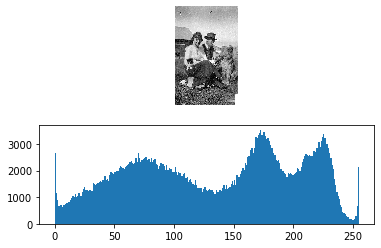

In [110]:
#visualize the first image from the set
I = io.imread(os.path.join(dataDir, data_name +r"//" +str(imgIds[0]).zfill(12) + ".jpg"))
#I = cv2.cvtColor(I, cv2.COLOR_RGB2BGR)

#Visualize the image
plt.subplot(2,1,1)    
plt.imshow(I)
plt.axis('off')
#visualize the histogram of the image
plt.subplot(2,1,2)   
plt.hist(I.ravel(),256, [0,255]);

In [24]:
# parameters for training the model
num_of_clss = y_train.shape[3]           # number of classes (the number of the categories form the to_categorial by keras)
lr =          1e-4        # learning rate 
beta_1 =      0.9         # beta 1 - for adam optimizer
beta_2 =      0.95        # beta 2 - for adam optimizer
epsilon =     1e-7        # epsilon - for adam optimizer
epochs =      150          # number of epochs
bs =          64          # batch size
dp =          0.5         # dropout probability

In [25]:


inp = Input(shape = (x_train.shape[1],x_train.shape[2],x_train.shape[3]))

# First conv block
x = Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation = 'relu')(inp)
x = Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation = 'relu')(x)
x = Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

# Second conv block
x = Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation = 'relu')(x)
x = Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(dp)(x)

# Third conv block
x = Conv2D(16, (3, 3), strides=(1, 1), padding='same', activation = 'relu')(x)
x = Conv2D(16, (3, 3), strides=(1, 1), padding='same', activation = 'relu')(x)
x = Conv2D(16, (3, 3), strides=(1, 1), padding='same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

# DECONV AND UNPOOLING

x = Conv2DTranspose(16, (3, 3), strides=(1, 1), padding='same', activation = 'relu')(x)
x = UpSampling2D((2, 2))(x)

x = Conv2DTranspose(32, (3, 3), strides=(1, 1), padding='same', activation = 'relu')(x)
x = UpSampling2D((2, 2))(x)

x = Conv2DTranspose(64, (3, 3), strides=(1, 1), padding='same', activation = 'relu')(x)
x = UpSampling2D((2, 2))(x)

x = Conv2DTranspose(128, (3, 3), strides=(1, 1), padding='same', activation = 'relu')(x)
x = UpSampling2D((2, 2))(x)

out = Conv2DTranspose(num_of_clss, (3, 3), strides=(1, 1), padding='same', activation = 'softmax')(x)


model = Model(inp,out)


In [26]:
# inp = Input(shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3]))

# conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inp)
# conv1 = Dropout(0.2)(conv1)
# conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
# pool1 = MaxPooling2D((2, 2))(conv1)

# conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
# conv2 = Dropout(0.2)(conv2)
# conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
# pool2 = MaxPooling2D((2, 2))(conv2)

# conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
# conv3 = Dropout(0.2)(conv3)
# conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)

# up1 = concatenate([UpSampling2D((2, 2))(conv3), conv2], axis=-1)
# conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1)
# conv4 = Dropout(0.2)(conv4)
# conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv4)

# up2 = concatenate([UpSampling2D((2, 2))(conv4), conv1], axis=-1)
# conv5 = Conv2D(32, (3, 3), activation='relu', padding='same')(up2)
# conv5 = Dropout(0.2)(conv5)
# conv5 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv5)

# out = Conv2D( num_of_clss, (1, 1) , padding='same')(conv5)

# model = Model(inp,out)


In [27]:
# define the optimizer and compile the model
adam = optimizers.Adam(lr=lr, beta_1=beta_1, beta_2=beta_2, epsilon=epsilon)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])


In [28]:
history = model.fit(x_train, y_train, validation_split=0.3, epochs=epochs, batch_size=bs)


Train on 82800 samples, validate on 35487 samples
Epoch 1/100
82800/82800 [==============================] - 102s 1ms/sample - loss: 0.2687 - accuracy: 0.9082 - val_loss: 0.2420 - val_accuracy: 0.9131 ETA: 2:05 - ETA: 1:34 - loss: 0.3319 - ac - ETA: 1:33 - loss: 0.3294 - accuracy: 0. - ETA: 1:32 - los - ETA:  - ETA: 1:26 - los - ETA: 1:24 - loss: 0.320 - ETA: 1:23 - loss: 0.3189 - accura - ETA:  - ETA: 1:19 - loss: 0.3 - ETA: 1:18 - loss: 0.3112 - accuracy:  - ETA: 1:18 - loss: 0.3108 - accu - ETA: 1:17 - loss: 0.3106 - accuracy:  - ETA: 1:16 - loss: 0.3102 - accura - ETA: 1:16 - loss: 0.3094 -  - ETA: 1:01 - loss: 0.2 - ETA: 1 - ETA: 57s - loss: 0.2923 - accuracy - ETA: 57s - loss: 0.2920 - acc - ETA: 56s - loss: 0.2915 - accuracy: 0.905 - ETA: 56s - loss - ET - ETA: 47s - loss - ETA: 45s - loss: 0.2856 - accuracy: 0.90 - ETA: 44s - loss: 0.2856 - a - ETA: 43s - loss: 0.2851 - accurac - ETA: 43s - loss: 0.2846 - accuracy: 0.90 - ETA: 43s - loss: 0.2845 - accurac - ETA: 42s - loss: 0.2

82800/82800 [==============================] - 98s 1ms/sample - loss: 0.2354 - accuracy: 0.9109 - val_loss: 0.2273 - val_accuracy: 0.9140 1:20 - loss: 0.2347 - accuracy: 0.91 - ETA:  - ETA: 1:19 - loss: 0.2339 - accu - ETA: 1:18 - loss: 0.2328 - accuracy: 0.91 - ETA: 1:18 - loss: 0.2 - ETA: 1:17 - loss: 0.2331 - accu - ETA: 1:17 - l - ETA: 1:16 - loss: 0.235 - ETA: 1:15 - loss: 0.2355  - ETA: 1:15 - loss: 0.2361 - accuracy:  - ETA: 1:15 - l - ETA: 1:09 - loss: 0.238 - ETA: 1:09 - loss: 0.2381 - accura - ETA - ETA: 1:07 - los - ETA: 1:05 - loss: 0.2372 - accuracy: 0.91 - ETA: 1:04 - loss: 0.2372 - accuracy - E - ETA: 1:00 - loss: 0.2362 - accuracy:  - ETA: 1:00 - loss: 0.2365 - accurac - ETA: 59s - loss: 0.2367 - accur - ETA: 59s - loss: 0.2371 - accu - ETA: 58s - loss: 0.2370 - accuracy: 0. - ETA - ETA: 55s - loss: 0.2363 - accuracy - ETA: 55s - loss: 0.2364 -  - ETA: 53s - - ETA: 51s - loss: 0.2367 - a - ETA: 50s - loss: 0. - ETA: 49s - loss: 0.2369 - accuracy - ETA: 48s - loss: 0.237

82800/82800 [==============================] - 98s 1ms/sample - loss: 0.2226 - accuracy: 0.9137 - val_loss: 0.2174 - val_accuracy: 0.9166loss: - ETA: 1:15 - loss: 0.2198 - accu - ETA: 1:15 - ETA: 1:13 - loss: 0.2209 - accuracy - - ETA: 1:12 - loss: 0.2218 - ac - ETA: 1: - ETA: 1:09 - loss: 0 - ETA: 1:08 - loss: 0.2246 - ac - ETA: 1:08 - loss: 0.2241 - accu - ETA: 1:07 - loss: 0.2239 - accuracy - ETA: 1:07 - loss: 0.2236 - accuracy - ETA: 1:07 - loss: 0.2229 - accuracy: 0.91 - ETA: 1:07 - loss: 0.2230  - ETA: 1: - ETA: 1:05 - loss: 0.2 - ETA: 1:04 - loss: 0 - ETA: 1:03 - loss: 0.2239 - accura - ETA: 1:03 - loss: 0.2245 - accuracy:  - ETA: 1:00 - loss: 0.2248 -  - ETA: 59s - loss: 0.2248 - accuracy: - ETA: 59s - loss: 0.2250 - a - ETA: 58s - loss: 0.2254 - accu - ETA: 57s - loss: 0.2252 - accuracy: 0.9 - ETA: 57s - loss: 0.2251 - accuracy: - ETA: 57 - ETA: 5 - ETA: 52s - loss: 0.2239 - accuracy: 0.91 - ETA: 52s - loss: 0.223 - ETA: 51s - loss: 0.2239 - accuracy: 0.91 - ETA: 50s - loss: 0

82800/82800 [==============================] - 98s 1ms/sample - loss: 0.2158 - accuracy: 0.9158 - val_loss: 0.2095 - val_accuracy: 0.9192 - accu - ETA: 1: - ETA: 1:16 - loss: 0.2141 - accuracy: 0. - ETA: 1:16 - loss: 0.2140 - accuracy: 0. - ETA: 1:16 - loss: 0.2142 - accu - ETA: 1:13 - loss: 0 - ETA: 1:12 - los - ETA: 1:11 - loss: 0.2145 - accuracy: 0.91 - ETA:  - - ETA: 1:04 - - ETA: 1:03 - loss: 0.2144 - accura - ETA: 1:03 - loss: - ETA: 1:02 - loss: 0.2145 - accu - ETA: 1:01 - loss: 0.2 - ETA: 1:01 - loss: 0.2143 - accura - ETA: 1:00 - loss: 0.2142 - accuracy:  - E - ETA: 55s - loss: 0.2146 - accuracy: - ETA: 55s - loss: 0.2144 - ac - ETA: 54s - loss: 0.2145 - ac - ETA: 53s - loss: 0.2143 - accurac - ETA: 52s - loss: 0.2147 - accu - ETA: 52s - loss: 0.2148 - accuracy: - ETA: 51s - loss:  - ETA: 50s - loss: 0.2146 - accuracy - ETA: 49s - loss: 0.2146 - accur - ETA: 48s - loss: 0.2146 - accuracy: 0.91 - ETA: 48s - loss: 0.2147 - accuracy:  - ETA: 48s - loss: 0.2148 - ac - ETA: 47s - l

82800/82800 [==============================] - 98s 1ms/sample - loss: 0.2104 - accuracy: 0.9176 - val_loss: 0.2102 - val_accuracy: 0.9192 1:20 - loss: 0.2087 - accuracy: 0.91 - ETA: 1:20 - loss: 0.2091 - ac - ETA: 1:20 - loss: 0.2060 - accuracy - - ETA: 1:18 - - ETA: 1:07 - ETA: 1:04 - loss: 0.2105 - accuracy - ETA: 1:04 - loss: 0 - ETA: 1:03 - loss: 0.2103 - accuracy:  - ETA: 1:03 - - ETA: 1:01 - loss: 0.2104 - accuracy: 0.91 - ETA: 1:00 - loss: 0.2104 - accurac - ETA: 58s - loss: 0 - ETA: 56s - loss: 0.2107 -  - E - ETA: 53s - loss:  - ETA: 51s - loss: 0.2109 - accur - ETA: 50s - loss:  - ETA: 49s - loss: 0.2104  - ETA: 48s - loss: 0.2101 - accu - ETA: 47s - loss: 0.209 - ETA: 46s - loss: 0.2099 - accurac - ETA: 45s - loss: 0.2100 - accuracy: 0.918 - ETA: 45s - loss: 0.2100 - accuracy: - ETA: 44s - loss: 0.2098 - accu - ETA: 44s - loss: 0.2 - ETA: 42s - loss: 0.2099 - accuracy: 0.918 - ETA: 42 - ETA: 40s - loss: 0.2097 - accuracy: 0. - ET - ETA: 37s - loss: 0.2104 -  - ETA: 3 - ETA: 

82800/82800 [==============================] - 98s 1ms/sample - loss: 0.2063 - accuracy: 0.9193 - val_loss: 0.2028 - val_accuracy: 0.9206A: 1:23 - loss: 0.2079 - accuracy: 0. - ETA: 1:22 - loss: 0.2198 -  - ETA: 1:22 - loss: 0.2174 - accuracy: 0.91 - ETA: 1:22 - loss: - ETA: 1:21 - - ETA: 1:16 - loss: 0.2059 -  - ETA: 1:15 - loss: 0 - ETA: 1:14 - loss: 0.2080 - accuracy: 0.91 - ETA: 1:14 - loss: 0.2077 - accuracy:  - ETA: 1: - ETA: 1:12 - loss: 0.2090 - accuracy: 0. - ETA: 1:12 - loss: 0.2092 - accu - ETA:  - ETA: 1:06 - loss: - ETA: 1:04 - loss: 0.2 - E - ETA: 1:02 - loss: 0.2068 - accuracy: 0.91 - ETA: 1:02 - loss: 0.2067 - accuracy - ETA: 1:00 - loss: 0.2070 - accu - ETA: 1:00 - loss: 0.2072 - accuracy: 0. - ETA: 1:00 - loss: 0 - ETA: 5 - ETA: 56s - loss: 0.2056 - accu - ETA: 55s - loss: 0.2056 - ac - ETA: 54s - loss: 0.2051 - accuracy - ETA: 54s - loss: 0.2050 - accuracy: 0.9 - ETA: 53s - loss: 0.2053 - accuracy: 0 - ETA: 53s - loss: 0.2054 - accuracy: 0.9 - ETA: 53s - loss: 0.2054

82800/82800 [==============================] - 98s 1ms/sample - loss: 0.2041 - accuracy: 0.9200 - val_loss: 0.2382 - val_accuracy: 0.8993: 0.2045 -  - ETA: 1:20 - loss: 0.2020 - accuracy: 0. - ETA: 1:20 - loss: 0.2010 - accuracy: 0. - ETA: 1:18 - loss: 0.2033 - accuracy: 0. - E - ETA: 1:13 - loss: 0.2066 - accuracy: 0.91 - ETA: 1:13 - loss: 0 - ETA: 1:12 - l - ETA: 1:12 - - ETA: 1:10 - loss: 0.2075 - accuracy:  - ETA: 1:10 - loss: 0.2074 - ac - ETA: 1:08 - loss: 0.2064 - accura - ETA: 1:07 - loss: 0.2 - ETA: 1:06 - loss: 0.2052 -  - E - ETA: 1:00 - loss: 0. - ETA: 58s - loss: 0.2059 - accuracy: 0 - ETA: 58s - loss: 0.2059 - accurac - ETA: 57s - loss: 0.2056 - accuracy: 0. - ETA: 57s - loss: 0.2056 - accuracy:  - ETA: 57s - loss: 0.2059 - accuracy: 0.918 - ETA: 57s - loss: 0.2058 - accuracy: 0.91 - ETA: 56s - loss: 0.20 - ETA: 55s - loss: 0.2 - ETA: 54s - loss: 0.2054 - accuracy: 0.9 - ETA: 54s - loss: 0.2054 - accuracy - ETA: 53s - loss: 0.2055 - accurac - ETA: 52s - loss: 0.2054 - ac 

82800/82800 [==============================] - 98s 1ms/sample - loss: 0.2014 - accuracy: 0.9211 - val_loss: 0.2028 - val_accuracy: 0.9199  - ETA: 1:21 - loss: 0.1 - ETA: 1:21 - loss: 0.1962 - accura - ETA: 1:20 - loss: 0.1968 - ac - ETA: 1:20 - ETA: 1:11 - l - ETA: 1: - ETA: 1:02 - los - ETA: 1:01 - loss: 0.2021 - ac - ETA: 1:00 - loss: 0.2025 - accu - ETA: 1:00 - loss: 0 - ETA: 53s - loss: 0.2022 - accuracy: 0. - ETA: 53s - loss: 0.2021 - accuracy: 0.9 - ETA: 52s - loss: 0.2022 - - ETA: 51s - loss: 0.2018 - accuracy: 0.920 - ETA: 51s - loss: 0. - ETA: 50s - loss:  - ETA: 48s - loss: 0.2017 - acc - ETA: 47s - loss: 0.2015 - accuracy: 0.921 - ETA: 47s - lo - ETA: 45s - loss: 0.2013 - accuracy: 0 - ETA: 45s - loss: 0.2012 - accu - ETA: 44s - loss: 0.2011 - accuracy: 0.9 - ETA: 44s - loss: 0.2010 - accuracy: 0.921 - ETA: 44s - loss: 0.2011 - accura - ETA: 43s - loss: 0.2010 - accuracy: 0.9 - ETA: 43s - loss: 0.2009 - accuracy:  - ETA: 43s - loss: 0.2007 - accuracy: 0.92 - ETA: 43s - loss:

82800/82800 [==============================] - 98s 1ms/sample - loss: 0.1982 - accuracy: 0.9224 - val_loss: 0.2008 - val_accuracy: 0.92001993 - accuracy: 0.92 - ETA: 1:00 - los - ETA: 58s - loss - ETA: 56s - loss: 0.1990 - accuracy: - ETA: 56s - loss: 0.1990 - accura - ETA: 55s - loss: 0.1988 -  - ETA: 54s - loss: 0.1989 - a - ET - ETA: 51s - loss: 0.1984 - accu - ETA: 50s - loss: 0.1985 - ETA: 49s - loss: 0.1986 - accuracy:  - ETA: 48s - loss: 0.1987 - accuracy: 0.9 - ETA: 48s - loss: 0.1 - ETA: 47s - loss: 0.1991 - accurac - ETA: 46s - loss: 0.1991 - acc - ETA: 42s - ETA: 40s - loss: 0 - ETA: 39s - loss: 0.1991 - accuracy: 0 - ETA: 38s - lo - ETA: 36s - loss: 0.1988 - accuracy:  - ETA: 36s - loss: 0.1988 - accuracy:  - ETA: 33s - loss: 0.1989 - accuracy: 0 - ETA: 32s - loss: 0.1989 - accur - ETA: 32s - loss: 0.1988 - accuracy:  - ETA: 31s - loss: 0.1991 - accuracy: 0. - ETA: 31s - loss: 0.1990 - accuracy: - ETA: 31s - loss: 0.1992 - accuracy: 0.92 - ETA: 28s - loss: 0.1993 - ETA: 26s

82800/82800 [==============================] - 98s 1ms/sample - loss: 0.1958 - accuracy: 0.9235 - val_loss: 0.2068 - val_accuracy: 0.9172ss: 0.2045 - accuracy: 0.92 - ETA: 1:21 - loss: 0.2040 - accuracy:  - ETA: 1:21 - loss: 0.2013 - ac - ETA: 1:20 - loss: 0.2 - ETA: 1:09 - loss: 0.1939 -  - ETA: 1:07 - loss: 0 - ETA: 1:07 - loss: 0.1942 - accuracy: 0.92 - ETA: 1:07 - loss: 0.1940 - accuracy:  - ETA: 1:06 - loss: 0.1939 - ac - ETA: 1:06 - loss: 0.1939 -  - ETA: 1:05 - loss: 0.1940 - accuracy: 0.92 - ETA: 1:04 - - ETA: 1:00 - loss: 0. - ETA: 59s - loss: 0.1942 - - E - ETA: 52s - loss: 0.1940 - acc - ETA: 51s - loss: 0.1943 - accuracy: 0 - ETA: 51s - loss: 0.1943 - - ETA: 47s - loss: 0.1950 - accuracy: 0.923 - ETA: 47s - loss: 0.1949 - accuracy: 0. - ETA: 47s - loss: 0.194 - ETA: 45s - loss: 0.19 - ETA: 44s - loss: 0.19 - ETA: 43s - loss: 0.1950 - accuracy: 0. - ETA: 42s - loss: 0.19 - ETA: 41s - loss: 0.1952 - ac - ETA: 40s - loss:  - ETA: 39s - loss: 0.1954 - acc - ETA: 38s - loss: 0.1

82800/82800 [==============================] - 98s 1ms/sample - loss: 0.1928 - accuracy: 0.9246 - val_loss: 0.2151 - val_accuracy: 0.9128ss: 0 - ETA: 1:21 - loss: 0.1855 - accuracy - ETA: 1:21 - loss: 0 - ETA: 1:20 - loss: 0.1869 - accuracy: 0.92 - ETA: 1:20 - loss: 0.1870 - accuracy: 0.92 - ETA: 1:20 - loss: 0.1865 - ac - ETA: 1:19 - loss: 0.1893 - ac - ETA: 1:19 - ETA: 1: - ETA: 1:16 - loss: 0.1967 - accuracy: 0. - ETA: 1:16 - loss: 0.1966 - accura - ETA: 1:16 - loss: 0.1966 - accura - ETA: 1:16 - loss: 0.1956 - accuracy:  - ETA: 1:15 - loss: 0.1952  - ETA: 1:15 - loss: 0.1948  - ETA: 1:14 - loss: 0.1948 - accuracy: 0. - ETA: 1:14 - loss: 0.1955 - accuracy: 0. - ETA:  - ETA: 1:11 - loss: 0.1 - ETA: 1:11 - loss: 0.1930 - accuracy: 0.92 - ETA: 1:10 - loss: 0.1932 -  - ETA: 1:10 - loss: 0.1936 - accu - ETA: 1:10 - loss: - ETA: 1:09 - loss: 0.1936 - accuracy - E - ETA: 1:07 - l - ETA: 1:06 - loss: 0.1942 - accuracy: 0.92 - ETA: 1:06 - - ETA: 1:04 - loss: 0.1938  - ETA: 1:03 - loss: 0.194

82800/82800 [==============================] - 98s 1ms/sample - loss: 0.1912 - accuracy: 0.9252 - val_loss: 0.1981 - val_accuracy: 0.9261ss: 0.2013 - accura - ETA: 1:20 - loss: 0.199 - ETA: 1:20 - ETA: 1:19 - loss: 0.1937 - ac - ETA: 1:18 - loss: 0.1930 -  - ETA: 1:18 - loss: 0.1923 - accura - ETA: 1:17 - loss: 0 - ETA: 1:17 - loss: 0.1928 - ac - ETA: 1:15 - loss: 0.1917 - accuracy - ETA: 1:14 - loss: 0.1917 - accuracy: 0. - ETA: 1:14 - loss: 0.1912 -  - ETA: 1:14 - - ETA: 1:13 - loss: 0.1907 - accu - ETA: 1:11 - loss: 0.1907 - ac - ETA: 1:10 - loss: 0.190 - E - ETA: 1:07 - - ETA: 1:04 - loss: 0.1919 - accuracy - ETA: 1:04 - loss: 0 - ETA: 1:03 - loss: 0.1 - - ETA: 1:01 - loss: 0.1935 - accuracy: 0. - ETA: 1:01 - loss: 0.1935 -  - ETA: 1 - ETA: 59s - loss: 0.1939 - accurac - ETA: 59s - loss: 0.1935 - accur - ETA: 58s - loss: 0.1937 - accur - ETA: 57s - loss: 0.1939 - accuracy: 0.924 - ETA: 57s - loss: 0.1938 - accuracy - ETA: 57s - loss:  - ETA: 55s - los - ETA: 53s - loss: 0.1930 - ac

82800/82800 [==============================] - 97s 1ms/sample - loss: 0.1895 - accuracy: 0.9258 - val_loss: 0.1879 - val_accuracy: 0.92791 - loss: 0 - ETA: 1:20 - loss: 0.1934 - accuracy: 0.92 - ETA: 1:20 - ETA: 1:19 - loss: 0.1922 - accu - ETA: 1:18 - loss: 0.1918 - accuracy - ETA: 1:18 - loss: 0.1921 - accuracy:  - ETA: 1:18 - l - ETA: 1:13 - loss: 0.1934 - accuracy - ETA: 1:12 - ETA - ETA: 1:09 - loss: 0 - ETA: 1:08 - loss: 0.1910 - accura - ETA: 1:07 - loss: 0.1907 - accuracy: 0.92 - ETA: 1:07 - loss: 0.1907 - accuracy - ETA: 1:07 - loss: - - ETA: 1:03 - loss: 0.1909 - accura - ETA: 1: - ETA: 1:02 - loss: 0.1918 - accuracy: 0.92 - ETA: 1:02 - loss: 0.1917 - accuracy: 0.92 - ETA: 1: - ETA: - ETA: 59s - loss: 0.1927 - accuracy: 0.92 - ETA: 59s - loss: 0.1927 - accuracy: 0.92 - ETA: 59s - loss: 0.1930 - accuracy: 0. - ETA: 59s - loss: 0.1930 - ETA: 58s - loss: 0.1926 - accurac - ETA: - ETA: 52s - loss: 0.1917 - accu - ETA: 51s - loss: 0.1915 - accuracy: 0. - ETA: 51s - loss: 0.1916 - 

82800/82800 [==============================] - 97s 1ms/sample - loss: 0.1888 - accuracy: 0.9262 - val_loss: 0.1908 - val_accuracy: 0.9255A: 1:20 - loss: 0.1910 - accuracy: 0.92 - ETA: 1:20 - loss: 0.1898 - accura - ETA: 1:20 - loss: 0.1893 - ac - ETA: 1:19 - loss: 0.191 - ETA: 1:18 - loss: 0.1901 - accuracy - ETA: 1:18 - loss: 0.1 - ETA: 1: - ETA: 1:13 - loss: 0.1861 - accuracy: 0.92 - ETA: 1:13 - loss: 0.1865 - ac - ETA: 1:13 - loss: 0.1858 - accuracy: 0. - ETA: 1:13 - ETA: 1:12 - loss: - ETA: 1:08 - l - ETA: 1:07 - loss: 0.1882 - ac - ETA: 1:06 - loss: 0.1882 - accuracy: 0.92 - ETA: 1:06 - loss: 0.1881 - accuracy: 0.92 - ETA: 1:06 - loss: 0.188 - ETA: 1:06 - loss: 0.1881 -  -  - ETA: 59s - loss: 0.1870 - accuracy: 0.9 - ETA: 59s - loss: 0.1871 - accurac - ETA: 59s - loss: 0.1868 - accuracy: 0 - ETA: 58s - loss: 0.1867 - acc - ETA: 57s - loss: 0.1866 - accur - ETA: 57s - loss: 0.1865 - accuracy - ETA: 56s - loss: 0.1871 - ETA: 55s  - ETA: 53s - loss: 0.1874 - accuracy: 0 - ETA: 53s - 

82800/82800 [==============================] - 97s 1ms/sample - loss: 0.1874 - accuracy: 0.9267 - val_loss: 0.1857 - val_accuracy: 0.9280ss: 0.1864 - accu - ETA: 1:08 - loss: 0.1864 - accuracy: 0. - ETA: 1:08 - - ETA: 1:01 - loss: 0.1874 - accuracy: 0.92 - ETA: 1:01 - loss: 0.1874 - accuracy:  - ETA: 1:01 - loss: 0.1 - ETA: 1:00 - loss: 0 - ETA: 1:00 - loss: 0.1870 - accuracy - ETA: 59s - loss: 0.1871  - ETA: 58s - loss: 0.1871 - accuracy: 0 - ETA: 58s - loss: 0.1871 - accuracy: 0 - ETA: 57s - l - ETA: 55s - loss: 0.1873 - accura - ETA: 55s - loss: 0.1 - ETA: 53s - loss: 0.1871 - accuracy: 0 - ETA: 53s - loss: 0.1871 - accuracy: 0.92 - ETA: 53s - loss: 0.1871 - accurac - ETA: 52s - loss: 0.1871 - acc - ETA: 52s - loss: 0.1871 - accu - ETA: 51s - loss: 0.1874 - acc - ETA: 50s - loss: 0. - ETA: 49s - loss: 0.1869 -  - ETA: 48s - loss: 0.1868 - - ETA: 46s - loss: 0.1865 - accur - ETA: 46s - loss: 0.1867 - accuracy: 0.927 - ETA: 46s - loss: 0.1867 - ac - ETA: 45s - loss: 0.1866 - - ETA: 44

82800/82800 [==============================] - 97s 1ms/sample - loss: 0.1865 - accuracy: 0.9269 - val_loss: 0.1860 - val_accuracy: 0.9274- loss: 0.1960 - accuracy: 0. - ETA: 1:19 - loss: 0.1941 - accuracy: 0.92 - ETA: 1:19 - loss: 0.1939 - accuracy:  - ETA: 1:19 - loss: 0.1 - ETA: 1:17 - loss: 0.1927 - accu - ETA: 1:17 - loss: 0.1920 -  - ETA: 1:16 - loss: 0.1916 - accuracy: 0. - ETA: 1:16 - ETA: 1:15 - loss: 0.1911 - accuracy:  - ETA: 1:15 - loss: 0.1909 - accuracy: 0. - ETA: 1:15 - loss: 0.1904 - accuracy - ETA: 1:14 - loss: 0.1900 - accuracy - E - ETA: 1:13 - loss: 0.1886 - accuracy: 0.92 - ETA: 1:13 - loss: 0.1886 - accuracy:  - ETA: 1:13 - l - ETA: 1:12 - loss: 0.1860 - accuracy: 0. - ETA: 1:12 - loss: 0.1862 - accuracy - ETA: 1:11 - ETA: 1: - ETA - ETA: 1:05 - - ETA: 1:01 - loss: 0.1855 - accuracy:  - ETA: 1:01 - loss: 0.1858 - accuracy:  - ETA: 1:00 - loss: 0 - ETA: 1:00 - loss: 0 - ETA: 58s - loss: 0.1860 - acc - ETA: 57s - loss: 0.1861 - accuracy: 0.927 - ETA: 57s - loss: 0.18

82800/82800 [==============================] - 97s 1ms/sample - loss: 0.1859 - accuracy: 0.9273 - val_loss: 0.1822 - val_accuracy: 0.9297:21 - loss: 0.1811 - accu - ETA: 1:21 - loss: 0.1895 - accuracy:  - ETA: 1:21 - loss: 0.1878 - accura - ETA: 1:21 - loss: 0.1870 - accura - ETA: 1:20 - loss: 0.1846 - accuracy: 0. - ETA: 1:20 - loss: 0.1822 - accuracy: 0.92 - ETA: 1:20 - loss: 0.1 - ETA: 1:19 - loss: 0.1815 - accuracy: 0.92 - ETA: 1: - ETA: 1:18 - loss: 0.1803 - accuracy:  - ETA: 1:10 - loss: 0.1830 -  - ETA: 1:10 - l - ETA: 1:09 - loss: 0 - ETA: 1:08 - loss: 0.1833 -  - ETA:  - ETA: 1:03 - - ETA: 1:02 - - ETA: 1:01 - loss: 0.1842 - ac - ETA: 1:01 - loss: 0.1841 - ac - ETA: 1:00 - ETA: 59s - loss: 0.1852 - accuracy: 0.927 - ETA: 59s - loss: 0.1853 - accuracy: 0.9 - ETA: 59s - loss: 0.1853 - accuracy:  - ETA: 59s - loss: 0.1854 - accu - ETA: 58s - loss: 0.1854 - accurac - ETA: 57s - loss: 0.1853 - ETA: 56s - loss: 0.1854 - accuracy: 0.927 - ETA: 56s - loss: 0.1854 - accuracy: 0.927 - E

82800/82800 [==============================] - 97s 1ms/sample - loss: 0.1846 - accuracy: 0.9277 - val_loss: 0.1843 - val_accuracy: 0.9274A: 1:22 - loss: 0.1837 - accuracy - ETA: 1:22 - ETA: 1:20 - loss: 0.1864 - accuracy:  - ETA: 1:20 - loss: 0.1853 - accuracy: 0. - ETA: 1:20 - loss: 0.1846 - accura - ETA: 1:20 - loss: 0.1859 - accuracy:  - ETA: 1:19 - loss: 0.1875 - accu - ETA: 1:17 - loss: 0.1859 - accuracy - ETA: 1:17 - loss: 0.1868 - accuracy: 0. - E - ETA: 1:16 - loss: 0.1843 -  - ETA: 1:15 - loss: 0.1834  - ETA: 1:15 - - ETA: 1:12 - los - ETA: 1:11 - loss: 0.1 - ETA: 1:10 - loss: 0 - ETA: 1:09 - loss: 0.1848 -  - ETA: 1:09 - loss: 0 - ETA: 1:08 - loss: 0.184 - ETA: 1:05 - l - ETA: 1:04 - loss: 0.1 - ETA: 1:00 - loss: 0.1846 - ac - ETA: 59s - loss: 0.1848 - accuracy: 0.927 - ETA: 59s - loss: 0.1847 - accuracy: 0.927 - ETA: 59s - loss: 0.1846 - accura - ETA: 59s - loss: 0.1852 - accuracy: 0.927 - ETA: 59s - loss: 0.18 - ETA: 57s -  - ETA: 55s - loss: 0.1853 - accuracy: 0 - ETA - ET

82800/82800 [==============================] - 97s 1ms/sample - loss: 0.1841 - accuracy: 0.9279 - val_loss: 0.1803 - val_accuracy: 0.9304ETA: 1: - ETA: 1:02 - - ETA: 1:01 - loss: 0.1832 -  - ETA:  -  - ETA: 46s - loss: 0.1846 - accu  - ETA: 42s - loss: 0.1850 - accurac - ETA: 42s - loss: 0.1849 - accuracy: 0.9 - ETA: 41s - loss: 0.1849 - accuracy: 0. - ETA: 41s - loss: 0.1851 - accur - ETA: 40s - loss: 0.1850 - accuracy: 0 - ETA: 40s - loss: 0.1850 - accuracy - ETA: 40s - loss: 0.1849 - accuracy:  - ETA: 39s - loss: 0.1851 - accuracy - ETA: 39s - loss: 0.1852 - accuracy - ETA: 38s - loss: 0. - ETA: 34s - loss: 0.185 - ETA: 33s - loss: 0.1851  - ETA: 31s - loss: 0.1851 - - ETA: 30s - loss: 0.1850 - accurac - ETA: 30s - loss: 0.1849 -  - ETA: 29s - loss: 0.1846 - accuracy: 0.927 - ETA: 29s - loss: 0.1846 - accura - ETA: 28s - loss: 0.1847 - accuracy: 0.927 - ETA: 28s - loss: 0.1847 -  - ETA: 27s - loss: 0.1848 - accura - ETA: 26s - loss: 0.1847 - acc - ETA: 26s - loss: 0.1847 - accuracy:

82800/82800 [==============================] - 97s 1ms/sample - loss: 0.1832 - accuracy: 0.9284 - val_loss: 0.1867 - val_accuracy: 0.9287 1:22 - loss: 0.1764 - accuracy: 0. - ETA: 1:22 - loss: 0.1812 - accuracy:  - ETA: 1:22 - loss: 0.1 - ETA: 1:20 - loss: 0.1813 - accuracy - ETA: 1:20 - loss: 0.1798 - accuracy:  - ETA: 1:20 - loss: 0.1796 - accuracy:  - ETA: 1:19 - loss: 0.1794  - ETA: 1:19 - los - - ETA: 1:17 - loss: 0.1822 - accuracy: 0.92 - ETA: 1:17 - loss: 0.182 - ETA: 1:16 - - ETA - ETA: 1:12 - l - ETA: 1:10 - loss: 0.1843 - accuracy: 0. - ETA: 1:10 - loss: 0.1843 - accura - ETA: 1:08 - loss: 0.183 - E - ETA:  - ETA: 1:00 - loss: 0.1821 - accuracy: 0. - ETA: 1:00 - l - ETA: 53s - loss: 0.1820 - accura - ETA: 52s - loss: 0.1821 - acc - ETA: 52s - loss: 0.1817 - accuracy: 0 - ETA: 51s - loss: 0.181 - ETA: 50s - loss: 0.1818 - acc - ETA: 49s - l - ETA: 47s - loss: 0.1823 - accuracy: 0.9 - ETA: 47s - loss: 0.1822 - a - ETA: 46s - loss: 0.1823 - accura - ETA: 46s - loss: 0.1826 - acc

82800/82800 [==============================] - 97s 1ms/sample - loss: 0.1821 - accuracy: 0.9288 - val_loss: 0.1877 - val_accuracy: 0.9284  - ETA: 1:14 - loss: 0.1792 - accuracy: 0. - ETA: 1:14 - loss: 0.1796 - accuracy:  - ETA: 1:14 - loss: 0.179 - E - ETA: 1:10 - loss: 0.1816 - accuracy: 0.92 - ETA: 1:07 - loss: 0.1813 - accuracy: 0.92 - ETA: 1:04 - loss: 0 - ETA: 1:04 - loss: 0.1815 - accura - ETA: 1:02 - loss: 0.1811 - accuracy:  - ETA: 1:02 - los - ETA: 1:01 - loss: 0 - ETA: 1:00 - loss: 0.1815 - accuracy: 0. - ETA: 1:00 - loss: 0.1816 - accu - ETA: 59s - loss: 0.1815 - accur - ETA: 47s - loss: 0.1810 - accuracy:  - ETA: 47s - loss: 0.1810 - accu - ETA: 46s - loss: 0.1813 - accuracy:  - ETA: 46s - loss: 0.1812 - accur - ETA: 45s - loss: 0.1810 - accuracy: 0.9 - ETA: 45s - loss: 0.1812 - accuracy: 0.92 - ETA: 45s - loss: 0.1811 - accuracy: 0.928 - ETA: 45s - loss: 0.1812 - accuracy: 0.928 - ETA: 44s - loss: 0.1812 - acc - ETA: 44s - loss: 0.1809 - accuracy: 0.928 - ETA: 44s - loss: 

82800/82800 [==============================] - 97s 1ms/sample - loss: 0.1814 - accuracy: 0.9291 - val_loss: 0.1974 - val_accuracy: 0.9231ss: 0.1832 - accuracy: 0.92 - ETA: 1:21 - loss: 0.1836 - accura - ETA: 1:21 - l - ETA: 1:18 - loss: 0.184 - ETA: 1:17 - ETA: 1:15 - - ETA: 1:14 - loss: 0.1814 - accura - ETA: 1:13 - loss: 0.1813 - accu - ETA: 1:12 - loss: 0.1802 - accuracy: 0.92 - ETA: 1:12 - loss: 0.1802 - accura - ETA: 1:11 - los - ETA: 1:10 - loss: 0.1799 - accuracy:  - ETA: 1:10 - l - ETA: 1:09 - loss: 0 - ETA: 1:02 - loss: 0.1796 - accuracy:  - ETA: 1:02 - loss: 0.1796 - accura - ETA: 1:02 - loss: 0.1797 - accuracy: 0.92 - ETA: 1:02 - loss: 0.179 - ETA: 1:01 - loss: - ETA: 1:00 - los - ETA: 1:00 - loss: 0.1800 - accuracy: 0.9 - ETA: 59s - loss: 0.1801 - accu - ETA: 59s - loss: 0.1797 - accuracy: 0.929 - ETA: 59s - loss: 0.1797 - accuracy: 0 - ETA: 58s - loss: 0.1798 - accuracy: 0.92 - ETA: 58s - loss: 0.1798 - accuracy: 0.929 - ETA: 58s - loss: 0.1799 - ETA: 57s - loss: 0.1801 - 

82800/82800 [==============================] - 97s 1ms/sample - loss: 0.1815 - accuracy: 0.9290 - val_loss: 0.1793 - val_accuracy: 0.9311- loss: 0.1928 - accu - ETA: 1:20 - loss: 0.1922 - accura - ETA: 1:19 - loss: 0.1 - ETA: 1:18 - loss: 0.1 - ETA: 1:17 - loss: 0.1786 -  - ETA: 1:17 - loss: 0.1796 -  - ETA: 1:16 - loss: 0.179 - ETA: 1:16 - - E - - ETA: 1:03 - loss: 0.1813 - accu - ETA: 1: - ETA: 1:00 - lo - ETA: 59s - loss: 0.1 - ETA: 58s - loss: 0.1822 - accur - ETA: 57s - lo - ETA: 55s - loss: 0.1818 - accuracy: 0.92 - ETA: 55s - loss: 0.1818 - - ETA: 54s - loss: 0. - ETA: 52s - loss: 0.1819 -  - ETA: 51s - loss: 0.1815 - accuracy: 0 - ETA: 5 - ETA:  - ETA: 46s - loss: 0.1817 - accura - ETA: 46s - loss: 0.1818 - accuracy: 0.929 - ETA: 46s - loss: 0.1818 - accuracy - ETA: 45s - loss: 0.1817 - acc - ETA: 44s - loss: 0.1819 - accurac - ETA: 44s -  - ETA: 42s - loss: 0.1820 - accuracy:  - ETA: 42s - loss: 0.1820 - accuracy:  - ETA: 41s - loss: 0.1818 - accuracy:  - ETA: 41s - loss: 0.18

82800/82800 [==============================] - 97s 1ms/sample - loss: 0.1806 - accuracy: 0.9294 - val_loss: 0.1842 - val_accuracy: 0.9281ETA: 1:17 - loss: 0.1 - ETA:  - ETA: 1:15 - loss: 0.1823 - accu - ETA: 1:15 - loss: 0.1821 - accuracy: 0.92 - ETA: 1:15 - loss: 0.1819 - accuracy: 0.92 - ETA: 1:15 - loss: 0.1817  - ETA: 1:14 - loss: 0.1809 - accuracy: 0.92 - ETA: 1:14 - loss: 0.1814 - accura - ETA: 1:14 - loss: - ETA: 1:13 - los - ETA: 1:12 - loss: 0.1 - ETA: 1:11 - loss: 0.1 - ETA: 1:02 - loss: 0.1805 - accura - ETA: 1:02 - l - ETA: 1:01 - loss: 0.1799 - accuracy:  - ETA: 1:00 - loss: 0.1798 - accu - ETA: 1:00 - loss: 0.1795 - accu - ETA: 1:00 - loss: 0.1796 - accurac - ETA: 59s - loss: 0.1794 - accurac - ETA: 59s - loss: 0.1789 -  - ETA: 58s - loss: 0.1790 - accuracy: 0.93 - ETA: 57s - loss: 0.1790 - accuracy: 0 - ETA: 57s - loss: 0.1791 - accu - ETA: 56s - loss:  - ETA: 55s - loss: 0.1789 - ac - ETA: 54s - loss: 0.1790 - accuracy: 0.9 - ETA: 54s - ETA: 51s - loss: 0.1795 - accurac

82800/82800 [==============================] - 97s 1ms/sample - loss: 0.1802 - accuracy: 0.9297 - val_loss: 0.1801 - val_accuracy: 0.92970 - ETA: 1:19 - loss: 0.1820 - accuracy: 0. - ETA: 1:19 - loss: 0 - ETA: 1:18 - loss: 0.1789 -  - ETA: 1:16 - loss: 0.1814 - ac - ETA: 1:16 - loss: 0.1822 - accuracy: 0. - ETA: 1: - ETA: 1:02 - loss: 0.1811  - ETA: 1:01 - loss: 0.1812 - accuracy: 0.92 - ETA: 1:01 - loss: 0.1813 -  - ETA: 1:00 - lo - ETA: 56s - loss: 0.1813 - accurac - ETA: 56s - loss: 0.181 - - ETA: 49s - loss: 0.1795 - - ETA: 48s - loss: 0.1794 - accuracy: 0.930 - ETA: 48s - loss: 0.1794 - accuracy: 0.930 - ETA: 48s  - ETA: 46s - loss: 0.1796 - accuracy:  - ETA: 45s - loss: 0.1796 - accur - ETA: 45s - loss: 0.1794 - accuracy: 0.9 - ETA: 44s - loss: 0.1795 - accuracy: - ETA: 41s - loss: 0.1790 - accura - ETA: 40s - loss: 0.1790  - ETA: 39s - loss: 0.1793 - accuracy: 0 - ETA: 39s - loss: 0.1792 - acc - ETA: 38s - ETA: 36s - loss: 0.1794 - accuracy: - ETA: 36s - loss: 0.1794 - accuracy:

82800/82800 [==============================] - 97s 1ms/sample - loss: 0.1799 - accuracy: 0.9297 - val_loss: 0.1801 - val_accuracy: 0.9302: 0 - ETA - ETA: 1:12 - loss: 0.1 - ETA: 1:11 - loss: 0.1782 - accuracy:  - ETA: 1:08 - ETA: 1:07 - loss: 0.1 - ETA: 1:06 - - ETA: 1:05 - loss: 0.1 - ETA: 1:04 - loss: 0.1790 - accuracy - ETA: 1:04 - loss: 0.1791 - accuracy: 0. - ETA: 1:04 - loss: 0.1792 - accuracy:  - ETA: 1:04 - loss: 0.1794 - accuracy:  - ETA: 1:04 - loss: 0.1795 - accuracy: 0.93  - ETA: 59s - loss: 0.1791 -  - ETA: 58s - loss: 0.1792  - ETA: 57s - loss: 0.1791 - accuracy: - ETA: 56s - loss: 0.1792 - accuracy: 0.93 - ETA: 56s - loss: 0.1794 - accurac - ETA: 55s - loss: 0.1798 - accuracy: 0.9 - ETA: 55s - loss: 0.1798 - accuracy: - ETA: 55s - loss: 0.1798 - accuracy: 0 - ETA: 54s - loss: 0.1799 - accura - ETA: 54s - loss: 0.1802 - accuracy: 0.92 - ETA: 54s - loss: 0.1801 - accuracy: 0.929 - ETA: 54s - loss: 0 - ETA: 52s - loss: 0.1797 - accura - ETA: 51s - loss: 0.1799 - accuracy: 0

82800/82800 [==============================] - 97s 1ms/sample - loss: 0.1791 - accuracy: 0.9299 - val_loss: 0.1838 - val_accuracy: 0.9280- ETA: 1:12 - loss: 0.179 - ETA: 1:11 - loss: 0.1787 - accuracy: 0.93 - ETA: 1:11 - loss: 0.1787 - accuracy: 0. - ETA: 1:11 - - ETA: 1:10 - loss: 0.1779 - accuracy: 0.93 - ETA: 1:10 - loss: 0.1778 - accuracy: 0.93 - ETA: 1:10 - loss: 0.1776 - accuracy: 0. - ETA: 1:10 - loss: - ETA - ETA:  - ETA: 1:05 - los - ETA: 1: - ETA: 1:03 - loss: 0.1778 - accu - E - ETA: 1:01 - loss: 0.1778 - accuracy: 0. - ETA: 1:01 - loss: 0.1779  - ETA: 1:01 - loss: 0.1779 - accuracy: 0. - ETA: 1:00 - loss: 0.1780 - accuracy: 0. - ETA:  - ETA: 59s - loss: 0.1781 - accuracy: 0.93 - ETA: 59s - loss: 0.1780 - accurac - ETA: 58s - loss: 0.17 - ETA: 57s - loss: 0.1786 - accuracy: 0.9 - ETA: 57s - loss: 0.1786 - accuracy - ETA: 56s - loss: 0.1790 - accuracy: 0.929 - ETA: 56s - loss: 0.1790 - accuracy: 0.92 - ETA: 56s - loss: 0.1790 - accuracy: 0 - ETA: 56s - loss: 0.1792 - accuracy

82800/82800 [==============================] - 97s 1ms/sample - loss: 0.1786 - accuracy: 0.9303 - val_loss: 0.1770 - val_accuracy: 0.931585  - ETA: 1:05 - loss: 0.1773 - accura - ETA: 1:04 - loss: 0.1768 - accuracy:  - ETA: 1:04 - los - ETA: 1 - ETA: 59s - loss: 0.1772 - a - ETA: 58s - lo - ETA: 56s - loss: 0.1770 - ac - ETA: 55s - loss: 0.1772 - accuracy - ETA: 55s - loss: 0.1770 - accuracy: 0. - ETA: 55s - loss: 0.1770 - ac - ETA: 54s - loss: 0.1770 - acc - ETA: 53s - loss: 0.1772 - accu - ETA: 52s - loss: 0.1770 - ETA: 51s - loss: 0.1768 - accuracy:  - ETA: 51s - loss: 0.1770 - accuracy: 0. - ETA: 50s - loss: 0.1772 - accuracy: 0.9 - ETA: 50s - loss: 0.1771 - accurac - ETA: 50s - loss: 0.1772 - - ETA: 48s - loss:  - ETA: 47s - loss: 0.1 - ETA: 45s - loss: 0.1777 - accuracy: 0.93 - ETA: 45s - loss: 0.1777 - accuracy - ETA: 45s - loss: 0.1777 - accura - ETA: 44s - loss: 0.1776 - accuracy: 0.9 - ETA: 44s - loss: 0.1776 - accurac - ETA: 43s - loss: 0.1777 - accuracy - ETA: 43s - loss: 0

82800/82800 [==============================] - 97s 1ms/sample - loss: 0.1784 - accuracy: 0.9304 - val_loss: 0.1795 - val_accuracy: 0.9297 1:11 - loss: 0.1798  - ETA: 1:11 - loss: 0 - ETA: 1:10 - loss: 0.1787 - accuracy: 0. - ETA: 1:10 - loss: 0.1 - ETA: 1:04 - loss: 0.178 - ETA: 59s - loss: 0.1794 - accuracy: 0.930 - ETA: 59s -  - ETA: 57s - loss: 0.1796 - accuracy: 0.930 - ETA: 57s - loss: 0.1797 - accuracy: 0.93 - ETA: 57s - loss: 0.1796 - accuracy: 0. - ETA - ETA: 54s - loss: 0.1791 - accuracy - ETA: - ETA: 51s - loss: 0.1798 - accuracy: 0 - ETA: 51s - l - ETA: 49s - loss: - ETA: 47s - loss: 0.1794 - accuracy:  - ETA: 47s - loss: 0.1796 - accuracy:  - ETA: 47s - loss: 0.1795 - accuracy: 0.93 - ETA: 47s - los - ETA: 42s - loss: 0.17 - ETA: 35s - loss: 0.1788 - a - ETA: 34s - loss: - ETA: 32s - loss: 0.1788 - accuracy: 0 - ETA: 32s - loss: 0.1786 - accuracy - ETA: 31s - loss: 0.1785 - accuracy: 0.930 - ETA: 3 - ETA: 26s -  - ETA: 24s - loss: 0.1787 - accuracy - ETA: 24s - loss: 0.1786

82800/82800 [==============================] - 97s 1ms/sample - loss: 0.1781 - accuracy: 0.9304 - val_loss: 0.1900 - val_accuracy: 0.92412 - loss: 0.1787 - ac - ETA: 1:01 - ETA: 1:00 - loss: - ETA: 59s - loss: 0.1786 - accuracy: 0.9 - ETA: 59s - loss: 0.1787 - accuracy - ETA: 59s - ETA: 57s - loss: 0.1786 - ac - ETA: 56s - loss: 0.1787 - accuracy: 0.930 - ETA: 56 - ETA: 53s - loss: 0.1788 - accuracy - ETA: 53s - loss: 0.1790 - accuracy: - ETA: 52s - loss: 0.1788 - accuracy: 0.930 - ETA: 52s - loss: 0.1787 - ac - ETA: 51s - loss: 0.1784 - accur - ETA: 51s - loss: 0.1785 - a - ETA: 50s - loss: 0.1787 - a - ETA: 49s - loss: 0.1785 - accuracy: 0.93 - ETA: 49s - loss: 0.1785 - accurac - ETA: 48s - loss: 0.17 - ETA: 47s - loss: 0.1782 - acc - ETA: 46s - loss: 0.1785 - accurac - ETA: 45s - loss: 0.1786 - accuracy: 0.93 - ETA: 45s - loss: 0.1786 - accuracy: 0.9 - ETA: 42s - loss:  - ETA: 41s - loss: 0.1783 - accuracy: 0.93 - ETA: 40s - loss: 0.17 - ETA: 39s - loss - ETA: 37s - loss: 0.1784 - -

82800/82800 [==============================] - 97s 1ms/sample - loss: 0.1774 - accuracy: 0.9305 - val_loss: 0.1758 - val_accuracy: 0.93231 - loss: 0.1 - ETA: 1:20 - ETA: 1:19 - loss: 0.1753 - accuracy: 0.93 - ETA: 1:19 - loss: 0.1752 - accuracy - E - ETA: 1:18 - los - ETA: 1:17 - loss: 0.1 - ETA: 1:13 - ETA: 1:12 - loss: - ETA: 56s - loss: 0.1773  - ETA: 55s - loss: 0.17 - ETA: 54s - loss: 0.1765 - acc - ETA: 53s - loss: 0.1765 - accuracy - ETA: 53s - loss: 0.1767 - accuracy: 0.930 - ETA: 52s - loss: 0.1766 - accu - ETA: 52s - loss: 0.1764 - accura - ETA: 51s  - ETA: 46s - loss: 0.1769 - accuracy: 0 - ETA: 46s - loss: 0.1768 - accuracy: 0.930 - ETA: 46s - loss: 0.1769 - accuracy:  - ETA: 45s - loss: 0.176 - ETA: 44s - loss: 0.1770 - accuracy: 0.93 - ETA: 44s - loss: 0.1771 - accuracy:  - ETA: 44s - loss: 0.1771 - accuracy: 0.930 - ETA: 44s - loss: 0.1770 - accurac - ETA: 43s - loss: 0.1769 - accuracy: 0. - ETA: 43s - loss: 0.1770 - accuracy: - ETA: 42s - loss: 0.1769 - accuracy: 0.93 -

82800/82800 [==============================] - 97s 1ms/sample - loss: 0.1771 - accuracy: 0.9307 - val_loss: 0.1795 - val_accuracy: 0.9314loss: 0.1684 - accuracy: 0. - ETA: 1:21 - loss: 0.1671 - accuracy:  - ETA: 1:20 - loss: 0.1699 - accu - ETA: 1:19 - loss: 0 - ETA: 1:19 - loss: 0.1731 - accuracy:  - E - ETA: 1:18 - loss: - ETA: 1:17 - loss: 0.1753 - ac - ETA: 1:15 - loss: 0.1753 -  - ETA: 1:14 - loss: 0.1752 - accuracy: 0.93 - ETA: 1:14 - loss: 0.1751 - accura - ETA: 1:14 - loss: 0.1747 -  - ETA: 1:14 - loss: 0.1 - ETA: 1:11 - loss: 0.1747 - accuracy:  - ETA: 1:11 - loss: 0.1748 - accuracy - ETA - ETA: 1:10 - loss: 0.1763 - accuracy - ETA: 1: - ETA: 59s - loss: 0.1756 - accuracy: 0.9313 - ETA: 59s - loss: 0.1 - ETA: 58s - loss: 0.1759 - accuracy: - ETA: 58s - loss: 0.1762 - accur - ETA: 57s - loss: 0.1765 - accura - ETA: 56s - loss: 0.1764 - accur - ETA: 56s - loss: 0.1761 - accuracy: 0. - ETA: 55s - loss: 0.1762 - ac - ETA: 54s - loss: 0.1759 - accuracy: 0.93 - ETA: 54s - loss: 0.17

82800/82800 [==============================] - 97s 1ms/sample - loss: 0.1770 - accuracy: 0.9307 - val_loss: 0.1858 - val_accuracy: 0.9305A:  - ETA: 1:20 - loss: 0.1794 - accuracy - ETA: 1:18 - loss: 0.1775 - ac - ETA: 1:18 - loss: 0.1772 - accuracy:  - ETA: 1:18 - loss: 0.1770 - accuracy - ETA: 1:17 - loss: 0.1777 - accuracy - ETA: 1:17 - loss: 0 - ETA: 1:16 - loss: 0.1 - ETA: 1:16 - loss: - ETA: 1: - ETA: 1:11 - loss: 0.1778 - accuracy:  - ETA: 1:10 - loss: 0.1 - E - ETA: 1:08 - loss: 0.1787 - accuracy: 0. - ETA: 1:08 - ETA: 1:07 - loss: 0.1 - ETA: 1:05 - ETA: 1:04 - loss: 0.1784 - accu - ETA: 1:03 - loss: 0.1783 - accura - ETA: 1:03 - loss: 0.1784 - accuracy - ETA: 1:03 - l - ETA:  - ETA: 1:01 - loss: 0.1788  - ETA: 1:00 - loss: 0.1788  - ETA: 1:00 - loss: 0.1786 - accuracy: 0. - ETA: 59s - loss: 0.1788 - accuracy: 0.929 - ETA: 59s - loss: 0 - ETA: 58s - loss: 0.1785 - accuracy: 0.930 - ETA: 58s - loss: 0.1784 - a - ETA: 57s - loss: 0.1785 - accur - ETA: 56s - loss: 0.1787 - accuracy

82800/82800 [==============================] - 97s 1ms/sample - loss: 0.1768 - accuracy: 0.9308 - val_loss: 0.1809 - val_accuracy: 0.9298 1:20 - loss: 0.1 - ETA: 1:19 - loss: 0.1813 - accuracy: 0.92 - ETA:  - ETA: 1:12 - loss: 0.1748 - accuracy - ETA: 1:12 - loss: 0.1751 - accuracy: 0.93 - ETA: 1:12 - loss: 0.1754 - accuracy:  - ETA: 1:12 - loss: 0.1755 - accuracy: 0.93 - ETA: 1:12 - - ETA:  - ETA: 1:09 - loss: 0.1764 - accuracy:  - ETA: 1:09 - los - ETA: 1:08 - loss: 0.1764 - accuracy: 0.93 - ETA: 1:08 - loss: 0.1765 - accu - ETA: 1:08 - loss: 0.1766  - ETA: 1:07 - loss: 0.1 - ETA: 1:01 - loss: 0.1765 - accuracy: 0.93 - ETA: 1:01 - loss: 0.1764 - accuracy - ETA: 1:00 - loss: 0.1 - ETA: 1:00 -  - ETA: 58s - loss: 0.17 - ETA: 57s - l - ETA: 52s - loss: 0.1777 - accur - ETA: 51s - loss: 0.1782 - - ETA: 50s - loss: 0.1779 - - ETA: 49s - loss: 0.1776 - accurac - ETA: 49s - loss: 0.1775 - accuracy: 0.9 - ETA: 48s - loss: 0.1775 - accuracy: 0.930 - ETA: 48s - loss: 0.1775 - accuracy: - ETA: 

82800/82800 [==============================] - 97s 1ms/sample - loss: 0.1762 - accuracy: 0.9312 - val_loss: 0.1796 - val_accuracy: 0.9312ccuracy: 0. - ETA: 1:12 - loss: 0.1 - ETA: 1:11 - loss: 0.1741 - accuracy:  - ETA: 1:11 - - ETA: 1:07 - loss: 0.1765 - ac - ETA: 1:06 - loss: 0.1760 - accuracy: 0.93 - ETA: 1:06 - loss: 0.1761 - accuracy - ETA: 1:06 - loss: 0.1764 -  - ETA: 1:05 - loss: - ETA: 1:05 - loss: 0.1762 - accuracy: 0.93 - ETA: 1:05 - loss: 0.1762 - ac - ETA: 1:04 - loss: 0.1761 - accuracy - ETA: 1:04 - loss: 0.176 - ETA: 1:03 - loss: 0.1760 - accuracy: 0. - ETA: 1:03 - loss: 0.1760 - accuracy: 0. - ETA: 1:03 - loss: 0.1759 - accura - ETA: 1:03 - loss: 0.1762 - accuracy: 0.93 - ETA: 1:03 - loss: 0.1762 - accuracy - ETA: 1:02 - loss: 0 - ETA: 1:00 - loss: 0.17 - ETA: 59s - los - ETA: 58s - loss: 0.1764 - accuracy: 0.9 - ETA: 57s - loss: 0.1766 - accuracy:  - ETA: - ETA: 55s - loss: 0.1761 - accuracy - ETA: 54s - loss: 0.1759 - accu - ETA: 53s - loss: 0.1762  - ETA: 52s - loss:

82800/82800 [==============================] - 97s 1ms/sample - loss: 0.1759 - accuracy: 0.9312 - val_loss: 0.1754 - val_accuracy: 0.9320acy:  - ETA: 1:20 - loss: 0.1742 - accuracy:  - ETA: 1:20 - loss: 0.1723  - ETA: 1:20 - loss: 0.1695 - accura - ETA: 1:10 - loss: 0.1757 - accuracy: 0. - ETA: 1:10 - loss: 0.175 - ETA: 1:09 - loss: 0.175 - ETA: 1:09 - loss: 0.1761 - ac - ETA: 1:08 - loss: 0.1760 -  - ETA: 1:08 - loss: 0.1759 - accuracy: 0. - ETA: 1:08 - loss: 0.1759 - accuracy - ETA: 1:07 - l - ETA: 1:06 - loss: 0.1763 - accuracy: 0.93 - ETA: 1:06 - l - ETA: 1:05 - loss: - E - ETA: 5 - ETA: 50s - loss: 0.1744 - accuracy: 0.9 - ETA: 50s - loss: 0.1743 - accuracy: 0.9 - ETA: 50s - loss: 0.1742 - accura - ETA: 49s - loss: 0.1746 - accura - ETA: 48s - loss: 0.1746 - accuracy: 0.93 - ETA: 48s - loss: 0. - ETA: 47s - loss: 0.1747 - accu - - ETA: 43s - loss: 0.1754 - accuracy: 0.9 - ETA: 37s - loss: 0.1750 - accuracy: 0. - ETA: 37s - loss: 0.1750 - accuracy: 0. - ETA: 37s - loss: 0.1749 - ac

82800/82800 [==============================] - 97s 1ms/sample - loss: 0.1760 - accuracy: 0.9313 - val_loss: 0.1876 - val_accuracy: 0.9290 1:06 - loss: 0.1760 - accuracy - ETA: 1:05 - loss: 0.1760 - accuracy:  - ETA: 1:05 - - ETA: 1:04 - loss: 0 - ETA: 1:02 - loss: 0.1763 - accuracy: 0. - ETA: 1:02 - loss: 0.1 - ETA: 1:01 - loss: 0.1761  - - ETA: 59s - loss: 0.1763 - a - ETA: 58s - loss: 0.1762 - accuracy: 0.93 - ET - ETA: 52s - loss: 0.1754 - accuracy: 0 - ETA: 52s - loss: - ETA: 50s - loss: 0.1758 - accuracy: 0.93 - ETA: 50s - loss: 0.1760 - ac - ETA: 49s - loss: 0.1758  - ETA: 48s - loss: 0.1758 - accuracy:  - ETA: 48s - loss: 0.1756 - accuracy: 0.9 - ETA: 48s - loss: 0.1757 - accurac - ETA: 47s - loss: 0.1757 - accura - ETA: 46s - loss: 0.1759 - accuracy: 0. - ETA: 46s - loss: 0.1759 - accura - ETA: 46s - loss: 0.1759 - accuracy: - ETA: 45s - loss: 0.1760 -  - ETA: 44s - loss: 0.1759 - accuracy - ETA: 44s - loss: 0.1761 - accuracy: 0.931 - ETA: 43s - loss: 0.1761 - ac - ETA: 43s - l

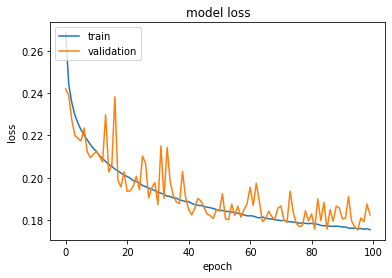

In [29]:
# plot train and validation loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show(); plt.close()

In [30]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [31]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [32]:
dataDir = "E:\Documents\Study\Deep Learning\Project\DATA"
data_name = "val2017"

coco_instances = COCO(os.path.join(dataDir,r"annotations\instances_" + data_name + ".json"))

# in the .getCatIds(catNms=[list of all ids we want to filter from the data]);
catIds = coco_instances.getCatIds(catNms=categories_names);
# get all the image id for all images based on the filter
imgIds = coco_instances.getImgIds(catIds=catIds);

img_list = []
for imgID in imgIds:
    I = cv2.imread(os.path.join(dataDir, data_name +r"//" +str(imgID).zfill(12) + ".jpg"),0)
    I = cv2.resize(I, dsize=(img_width, img_height), interpolation=cv2.INTER_CUBIC)
    img_list.append(I)

x_test = np.asarray(img_list).astype('float')
x_test = (np.expand_dims(x_test, axis=3)).astype('float')
print('x_test shape:', x_test.shape)

loading annotations into memory...
Done (t=2.98s)
creating index...
index created!
x_test shape: (2693, 64, 64, 1)


(-0.5, 63.5, 63.5, -0.5)

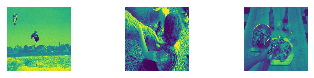

In [33]:
plt.subplot(3,3,1)
plt.imshow(np.squeeze(x_test[0,:,:].astype('uint8')))
plt.axis('off')

plt.subplot(3,3,2)
plt.imshow(np.squeeze(x_test[1,:,:].astype('uint')))
plt.axis('off')

plt.subplot(3,3,3)
plt.imshow(np.squeeze(x_test[2,:,:].astype('uint')))
plt.axis('off')



In [34]:

mask_list = []
for cnt, imgID in enumerate(imgIds):
    annIds = coco_instances.getAnnIds(imgIds=imgID, catIds=catIds, iscrowd=None)
    anns = coco_instances.loadAnns(annIds)
    img_data = coco_instances.loadImgs(imgID)[0]
    anns_img = np.zeros((img_height, img_width),)
    for ann in anns:
        mask_res = cv2.resize(coco_instances.annToMask(ann), (img_height, img_width), interpolation = cv2.INTER_AREA )
        anns_img = np.maximum(anns_img, mask_res*(catIds.index((ann['category_id']))+1))
        
    #mask = cv2.resize(anns_img, dsize=(img_width, img_height), interpolation=cv2.INTER_CUBIC)    
    #save mask to disk
    #cv2.imwrite(r"E:\Documents\Study\Deep Learning\Project\TestMASKS\\" +str(imgID).zfill(12) + ".png" , mask)
    mask_list.append(anns_img)

    
#y_train = read_data(r'E:\Documents\Study\Deep Learning\Project\MASKS')
#y_train = (to_categorical(y_train)).astype('float')

y_test = np.asarray(mask_list)
#y_test = (np.expand_dims(y_test, axis=3)).astype('float')
y_test = (to_categorical(y_test, num_classes=y_train.shape[3], dtype='float32')).astype('float')

print('y_test shape:', y_test.shape)


y_test shape: (2693, 64, 64, 2)


In [35]:
#plt.hist((coco_instances.annToMask(ann)*49).ravel(),256, [0,255]);
#plt.hist(mask_list[0].ravel(),256, [0,255]);
#plt.imshow(mask_list[0])

In [36]:
#y_pred = loaded_model.predict(x_test)


In [37]:
y_pred = model.predict(x_test)
test_loss, test_acc = model.evaluate(x_test, y_test)

# Print results
print('test loss:', test_loss)
print('test accuracy:', test_acc)


2693/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

test loss: 0.28229933461424056
test accuracy: 0.87995625


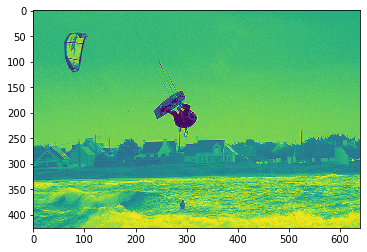

In [38]:
#Visialize the source image
img = cv2.imread(os.path.join(dataDir, data_name +r"//" +str(imgIds[0]).zfill(12) + ".jpg"),0)
plt.imshow(img)

(-0.5, 63.5, 63.5, -0.5)

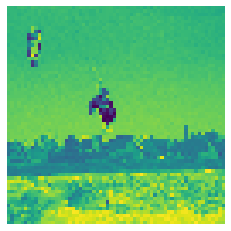

In [39]:
#Visialize the resized image
plt.imshow((x_test[0,:,:,0]).astype('uint8'))
plt.axis('off')

(-0.5, 63.5, 63.5, -0.5)

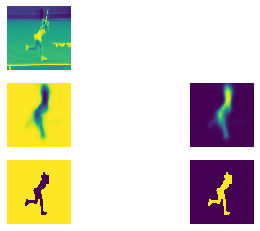

In [53]:
# visualize the predicted resaults vs the real resaults
img_idx = 20
plt.subplot(3,2,1)
plt.imshow((x_test[img_idx,:,:,0]).astype('uint8'))
plt.axis('off')

plt.subplot(3,2,3)
plt.imshow((y_pred[img_idx,:,:,0]*255).astype('uint8'))
plt.axis('off')

plt.subplot(3,2,4)
plt.imshow((y_pred[img_idx,:,:,1]*255).astype('uint8'))
plt.axis('off')

plt.subplot(3,2,5)
plt.imshow((y_test[img_idx,:,:,0]*255).astype('uint8'))
plt.axis('off')

plt.subplot(3,2,6)
plt.imshow((y_test[img_idx,:,:,1]*255).astype('uint8'))
plt.axis('off')


In [41]:
#cm = confusion_matrix(np.argmax(y_test,axis=1)[1], np.argmax(np.round(y_pred),axis=1)[1])
#labels = ['class ' + str(i) for i in range(num_of_clss)] 
#plot_confusion_matrix(cm,labels,title='Confusion Matrix',normalize=True)


In [42]:

test_img = cv2.imread(r"E:\Documents\Study\Deep Learning\Project\DATA\test2017\000000000019.jpg",0)
resize_img = [cv2.resize(test_img, (64, 64), interpolation = cv2.INTER_AREA )]
img = (np.expand_dims(np.asarray(resize_img), axis=3)).astype('float')
img.shape

(1, 64, 64, 1)

In [43]:
pred = loaded_model.predict(img)

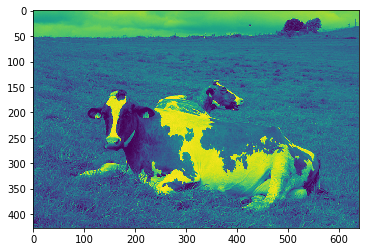

In [44]:
plt.imshow(test_img)

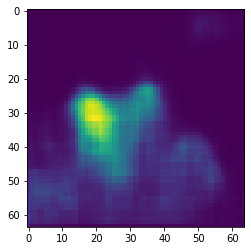

In [46]:
plt.imshow(pred[0,:,:,1])